# Final Project: Health Habits Affect on Predicting Obesity
##### Group Names: Breanne Jones, Jazmin Leyva, Maria Ocegueda, Gia Nhu Ly, Trang Tran


#### 1. Describe the dataset and define the variables used.
We are estimating obesity levels in individuals from Mexico, Peru, and Coloumbia, based on their eating habits and physical condition.

- Gender
- Age
- Height
- Weight
- family_history_with_overweight: If they have a family member who suffered or suffers from overweight
- FAVC : Frequency of high caloric food is consumed
- FCVC: Amount of times vegetables are consumed with meals
- NCP: Number of main meals the subject eats per day
- CAEC: Frequency of food consumed between meals
- SMOKE: If the subject smokes
- CH20: The amount of water  the subject drinks per day (by liters)??
- SCC: Whether the amount of calories consumed are tracked daily
- FAF: Amount of physical activity per week
- TUE: Amount of hours that the subject uses electronic devices per day
- CALC: Frequency of alcohol consumed
- MTRANS: Type of transportation used
- NObeyesdad: Obesity Level

Dataset source (URL): https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import cluster
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
from io import StringIO
from sklearn import tree
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
import matplotlib.image as mpimg
from sklearn.metrics import mean_squared_error, accuracy_score
import xgboost
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
import xgboost
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as sm
import statsmodels.api as sm1

In [ ]:
df = pd.read_csv('ObesityDataSet.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
# Dropping "Height" and "Weight" to avoid multicollinearity

df = df.drop(columns=['Height', 'Weight'])
df.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   family_history_with_overweight  2111 non-null   object 
 3   FAVC                            2111 non-null   object 
 4   FCVC                            2111 non-null   float64
 5   NCP                             2111 non-null   float64
 6   CAEC                            2111 non-null   object 
 7   SMOKE                           2111 non-null   object 
 8   CH2O                            2111 non-null   float64
 9   SCC                             2111 non-null   object 
 10  FAF                             2111 non-null   float64
 11  TUE                             2111 non-null   float64
 12  CALC                            21

In [ ]:
#number of categories in each of the categrocial variables

categories = pd.concat([df['CAEC'], df['CALC']])
unique_elements = pd.unique(categories)
print (unique_elements)     # 4 categories for both variables 'CAEC' and ' CALC'
print(df.MTRANS.unique())  # 5 categories
print(df.NObeyesdad.unique()) # 7 categories

['Sometimes' 'Frequently' 'Always' 'no']
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [ ]:
# Create dummies for categorical and binary variables

df = pd.get_dummies(df, columns=['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS','NObeyesdad'], drop_first=True)
df.head()

,Age,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,FAVC_yes,CAEC_Frequently,...,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,21.0,2.0,3.0,2.0,0.0,1.0,False,True,False,False,...,False,False,True,False,True,False,False,False,False,False
1,21.0,3.0,3.0,3.0,3.0,0.0,False,True,False,False,...,False,False,True,False,True,False,False,False,False,False
2,23.0,2.0,3.0,2.0,2.0,1.0,True,True,False,False,...,False,False,True,False,True,False,False,False,False,False
3,27.0,3.0,3.0,2.0,2.0,0.0,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,22.0,2.0,1.0,2.0,0.0,0.0,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True


In [ ]:
# Display all columns

pd.set_option('display.max_columns', None)  # None(No limit) or value
df.head()

,Age,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,FAVC_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,21.0,2.0,3.0,2.0,0.0,1.0,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False
1,21.0,3.0,3.0,3.0,3.0,0.0,False,True,False,False,True,False,True,True,False,True,False,False,False,True,False,True,False,False,False,False,False
2,23.0,2.0,3.0,2.0,2.0,1.0,True,True,False,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False
3,27.0,3.0,3.0,2.0,2.0,0.0,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False
4,22.0,2.0,1.0,2.0,0.0,0.0,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True


In [ ]:
# Rename columns
df.rename(columns={'Gender_Male': 'Male', 'MTRANS_Public_Transportation': 'T_Public', 'MTRANS_Walking': 'T_Walk', 'MTRANS_Motorbike': 'T_Motorbike', 'family_history_with_overweight_yes': 'fam_overweight_yes','NObeyesdad_Normal_Weight': 'Normal', 'NObeyesdad_Obesity_Type_I': 'ObeseType_I', 'NObeyesdad_Obesity_Type_II': 'ObeseType_II', 'NObeyesdad_Obesity_Type_III': 'ObeseType_III', 'NObeyesdad_Overweight_Level_I' : 'Overwght_Level_I', 'NObeyesdad_Overweight_Level_II': 'Overwght_level_II', 'MTRANS_Bike': 'T_Bike' }, inplace=True)
df.head()

,Age,FCVC,NCP,CH2O,FAF,TUE,Male,fam_overweight_yes,FAVC_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,T_Bike,T_Motorbike,T_Public,T_Walk,Normal,ObeseType_I,ObeseType_II,ObeseType_III,Overwght_Level_I,Overwght_level_II
0,21.0,2.0,3.0,2.0,0.0,1.0,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False
1,21.0,3.0,3.0,3.0,3.0,0.0,False,True,False,False,True,False,True,True,False,True,False,False,False,True,False,True,False,False,False,False,False
2,23.0,2.0,3.0,2.0,2.0,1.0,True,True,False,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False
3,27.0,3.0,3.0,2.0,2.0,0.0,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False
4,22.0,2.0,1.0,2.0,0.0,0.0,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 2111 non-null   float64
 1   FCVC                2111 non-null   float64
 2   NCP                 2111 non-null   float64
 3   CH2O                2111 non-null   float64
 4   FAF                 2111 non-null   float64
 5   TUE                 2111 non-null   float64
 6   Male                2111 non-null   bool   
 7   fam_overweight_yes  2111 non-null   bool   
 8   FAVC_yes            2111 non-null   bool   
 9   CAEC_Frequently     2111 non-null   bool   
 10  CAEC_Sometimes      2111 non-null   bool   
 11  CAEC_no             2111 non-null   bool   
 12  SMOKE_yes           2111 non-null   bool   
 13  SCC_yes             2111 non-null   bool   
 14  CALC_Frequently     2111 non-null   bool   
 15  CALC_Sometimes      2111 non-null   bool   
 16  CALC_n

### 2. Descriptive Statitics for variables used:

In [ ]:
df.describe()

,Age,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,3.000000,4.000000,3.000000,3.000000,2.000000


- The averge age of individuals in this study is 24 but it ranges from people from ages between 14 - 61
- The average meals consumed per day that contain vegetables are 2.4
- The average number of main meals consumed per day are 2.6
- The avagere amount of water consumed per day (in liters) is 2L
- The average amount of days of physical activity per week is 1 day
- The average amount of hours of tech used per day is .65 hours

### 3. Correlation Report:

In [ ]:
df.corr().round(3)

,Age,FCVC,NCP,CH2O,FAF,TUE,Male,fam_overweight_yes,FAVC_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,T_Bike,T_Motorbike,T_Public,T_Walk,Normal,ObeseType_I,ObeseType_II,ObeseType_III,Overwght_Level_I,Overwght_level_II
Age,1.000,0.016,-0.044,-0.045,-0.145,-0.297,0.048,0.206,0.064,-0.122,0.144,-0.062,0.092,-0.116,0.083,-0.012,-0.019,0.004,0.020,-0.554,-0.063,-0.161,0.111,0.250,-0.055,-0.056,0.169
FCVC,0.016,1.000,0.042,0.068,0.020,-0.101,-0.275,0.040,-0.027,0.048,0.009,-0.104,0.014,0.072,-0.019,0.083,-0.077,-0.030,-0.008,0.058,0.014,-0.063,-0.195,-0.021,0.463,-0.115,-0.118
NCP,-0.044,0.042,1.000,0.057,0.130,0.036,0.068,0.071,-0.007,0.048,0.009,-0.146,0.008,-0.016,-0.019,0.099,-0.092,0.023,0.004,-0.057,0.007,0.027,-0.146,0.031,0.172,-0.093,-0.098
CH2O,-0.045,0.068,0.057,1.000,0.167,0.012,0.108,0.147,0.010,-0.139,0.053,0.159,-0.032,0.008,0.049,0.062,-0.083,0.026,-0.001,0.038,0.008,-0.102,0.076,-0.086,0.139,0.033,0.011
FAF,-0.145,0.020,0.130,0.167,1.000,0.059,0.190,-0.057,-0.108,0.033,-0.049,0.024,0.011,0.074,0.055,-0.136,0.119,0.067,-0.016,-0.049,0.109,0.111,-0.012,-0.018,-0.173,0.022,-0.025
TUE,-0.297,-0.101,0.036,0.012,0.059,1.000,0.017,0.023,0.068,-0.002,0.039,-0.111,0.018,-0.011,0.061,-0.103,0.080,-0.022,-0.067,0.144,0.073,0.012,0.014,-0.095,-0.037,-0.029,0.026
Male,0.048,-0.275,0.068,0.108,0.190,0.017,1.000,0.103,0.065,-0.123,0.072,0.063,0.045,-0.103,0.035,-0.038,0.024,0.057,0.045,-0.160,0.039,0.002,0.044,0.394,-0.428,-0.005,0.111
fam_overweight_yes,0.206,0.040,0.071,0.147,-0.057,0.023,0.103,1.000,0.208,-0.269,0.341,-0.189,0.017,-0.185,-0.022,-0.025,0.033,-0.015,-0.051,-0.059,-0.067,-0.285,0.188,0.188,0.201,-0.100,0.124
FAVC_yes,0.064,-0.027,-0.007,0.010,-0.108,0.068,0.065,0.208,1.000,-0.181,0.191,-0.030,-0.051,-0.191,-0.057,0.140,-0.122,-0.082,-0.035,0.029,-0.179,-0.197,0.118,0.117,0.150,0.050,-0.173
CAEC_Frequently,-0.122,0.048,0.048,-0.139,0.033,-0.002,-0.123,-0.269,-0.181,1.000,-0.813,-0.057,0.041,0.114,0.066,-0.128,0.103,-0.021,0.077,0.068,0.042,0.217,-0.137,-0.141,-0.149,-0.083,-0.074


In [ ]:
def corr_sig(df=None):
    p_matrix = np.zeros(shape=(df.shape[1],df.shape[1]))
    for col in df.columns:
        for col2 in df.drop(col,axis=1).columns:
            _ , p = stats.pearsonr(df[col],df[col2])
            p_matrix[df.columns.to_list().index(col),df.columns.to_list().index(col2)] = p
    return p_matrix

def plot_cor_matrix(corr, mask=None):
    f, ax = plt.subplots(figsize=(11, 9))
    sns.heatmap(corr, ax=ax,
                mask=mask,
                # cosmetics
                annot=True, vmin=-1, vmax=1, center=0,
                cmap='coolwarm', linewidths=2, linecolor='black', cbar_kws={'orientation': 'horizontal'})

/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


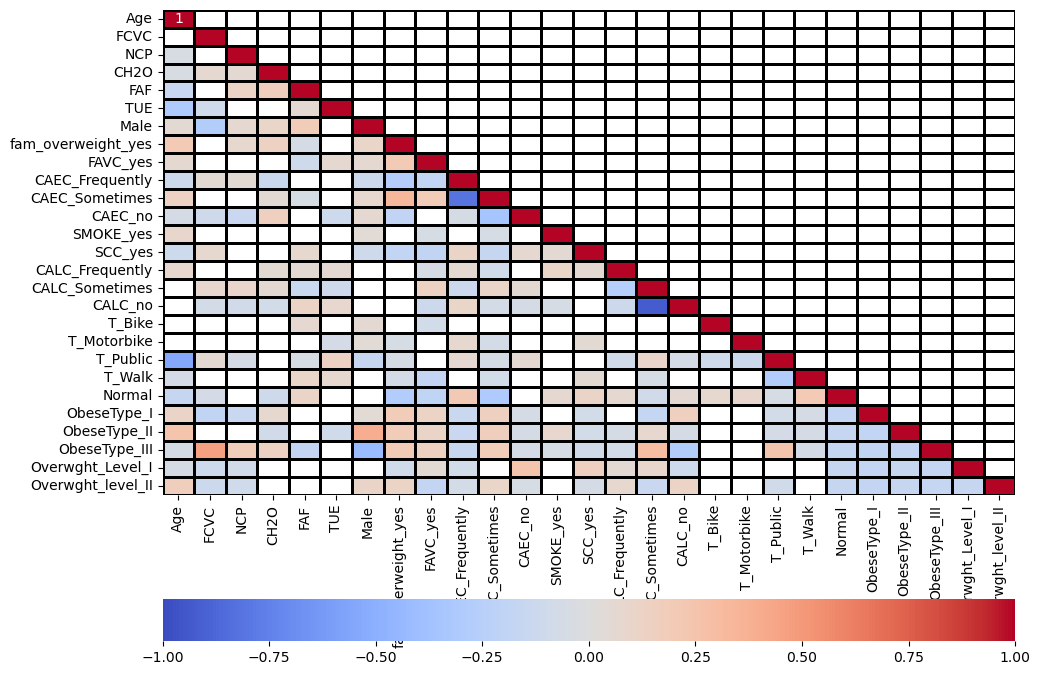

In [ ]:
corr = df.corr()                        # get correlation
p_values = corr_sig(df)                 # get a p-Value
mask = np.invert(np.tril(p_values < 0.05))   # mask - only significant corr

plot_cor_matrix(corr,mask)

- There appears to be a strong correlation between the amount of vegetables consumed with meals per day and individuals who classify as Obese Type III
- There is a correlation between individuals who identify as male and individuals who classify as Obese Type II
- There is a correlation between individuals who consume alcohol sometimes and Obese Type III
- There is also a slight correlation between indiviuals who have a family memeber who suffered or suffers from overweight and all the Obese Types.

### 5. Develop a machine learning model and write down the model equation.
- NObeyesdad = β0 + β1 FAVC + β2 FCVC + β3 NCP + β4 CAEC + β5 SMOKE + β6 CH20 + β7 SCC + β8 FAF + β9 TUE + β10 CALC + β11 MTRANS + ε


In [ ]:
df1 = pd.read_csv('ObesityDataSet.csv')
df1.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
# Dropping "Height" and "Weight" to avoid multicollinearity

df1 = df1.drop(columns=['Height', 'Weight'])
df1.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
# Create dummies EXCEPT for 'NObeyesdad'

df1 = pd.get_dummies(df1, columns=['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS'], drop_first=True)
df1.head()

,Age,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Male,family_history_with_overweight_yes,FAVC_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,2.0,3.0,2.0,0.0,1.0,Normal_Weight,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False
1,21.0,3.0,3.0,3.0,3.0,0.0,Normal_Weight,False,True,False,False,True,False,True,True,False,True,False,False,False,True,False
2,23.0,2.0,3.0,2.0,2.0,1.0,Normal_Weight,True,True,False,False,True,False,False,False,True,False,False,False,False,True,False
3,27.0,3.0,3.0,2.0,2.0,0.0,Overweight_Level_I,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True
4,22.0,2.0,1.0,2.0,0.0,0.0,Overweight_Level_II,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False


In [ ]:
# Rename columns
df1.rename(columns={'Gender_Male': 'Male', 'MTRANS_Public_Transportation': 'T_Public', 'MTRANS_Walking': 'T_Walk', 'MTRANS_Motorbike': 'T_Motorbike', 'family_history_with_overweight_yes': 'fam_yes', 'MTRANS_Bike': 'T_Bike' }, inplace=True)
df1.head()

,Age,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Male,fam_yes,FAVC_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,T_Bike,T_Motorbike,T_Public,T_Walk
0,21.0,2.0,3.0,2.0,0.0,1.0,Normal_Weight,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False
1,21.0,3.0,3.0,3.0,3.0,0.0,Normal_Weight,False,True,False,False,True,False,True,True,False,True,False,False,False,True,False
2,23.0,2.0,3.0,2.0,2.0,1.0,Normal_Weight,True,True,False,False,True,False,False,False,True,False,False,False,False,True,False
3,27.0,3.0,3.0,2.0,2.0,0.0,Overweight_Level_I,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True
4,22.0,2.0,1.0,2.0,0.0,0.0,Overweight_Level_II,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False


In [ ]:
column_to_move = 'NObeyesdad'
new_position = 0
cols = df1.columns.tolist()
cols.remove(column_to_move)
cols.insert(new_position, column_to_move)
df1 = df1[cols]
df1.head()

,NObeyesdad,Age,FCVC,NCP,CH2O,FAF,TUE,Male,fam_yes,FAVC_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,T_Bike,T_Motorbike,T_Public,T_Walk
0,Normal_Weight,21.0,2.0,3.0,2.0,0.0,1.0,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False
1,Normal_Weight,21.0,3.0,3.0,3.0,3.0,0.0,False,True,False,False,True,False,True,True,False,True,False,False,False,True,False
2,Normal_Weight,23.0,2.0,3.0,2.0,2.0,1.0,True,True,False,False,True,False,False,False,True,False,False,False,False,True,False
3,Overweight_Level_I,27.0,3.0,3.0,2.0,2.0,0.0,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True
4,Overweight_Level_II,22.0,2.0,1.0,2.0,0.0,0.0,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False


In [ ]:
# Defining x and y & train, test split

y1= df1.NObeyesdad
x1= df1.drop(columns=['NObeyesdad'])
xtrain, xtest, ytrain, ytest = train_test_split(x1,y1, random_state=1)

In [ ]:
#  Define and fit a decision tree model on the data

m = DecisionTreeClassifier(criterion="entropy", max_depth=4) # number of splits
m.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
# Predicting the target in the test data and displaying accuracy rate

pred = m.predict(xtest)
print("Accuracy: ", metrics.accuracy_score(ytest, pred))

Accuracy:  0.5397727272727273


In [ ]:
dot = StringIO()
file = "Obesity.png"
feature = df1.columns[1:]
out=tree.export_graphviz(m, feature_names=feature, out_file=dot, class_names= np.unique(ytrain), filled=True, rotate=True)
gr = pydotplus.graph_from_dot_data(dot.getvalue())
gr.write_png(file)
img = mpimg.imread(file)

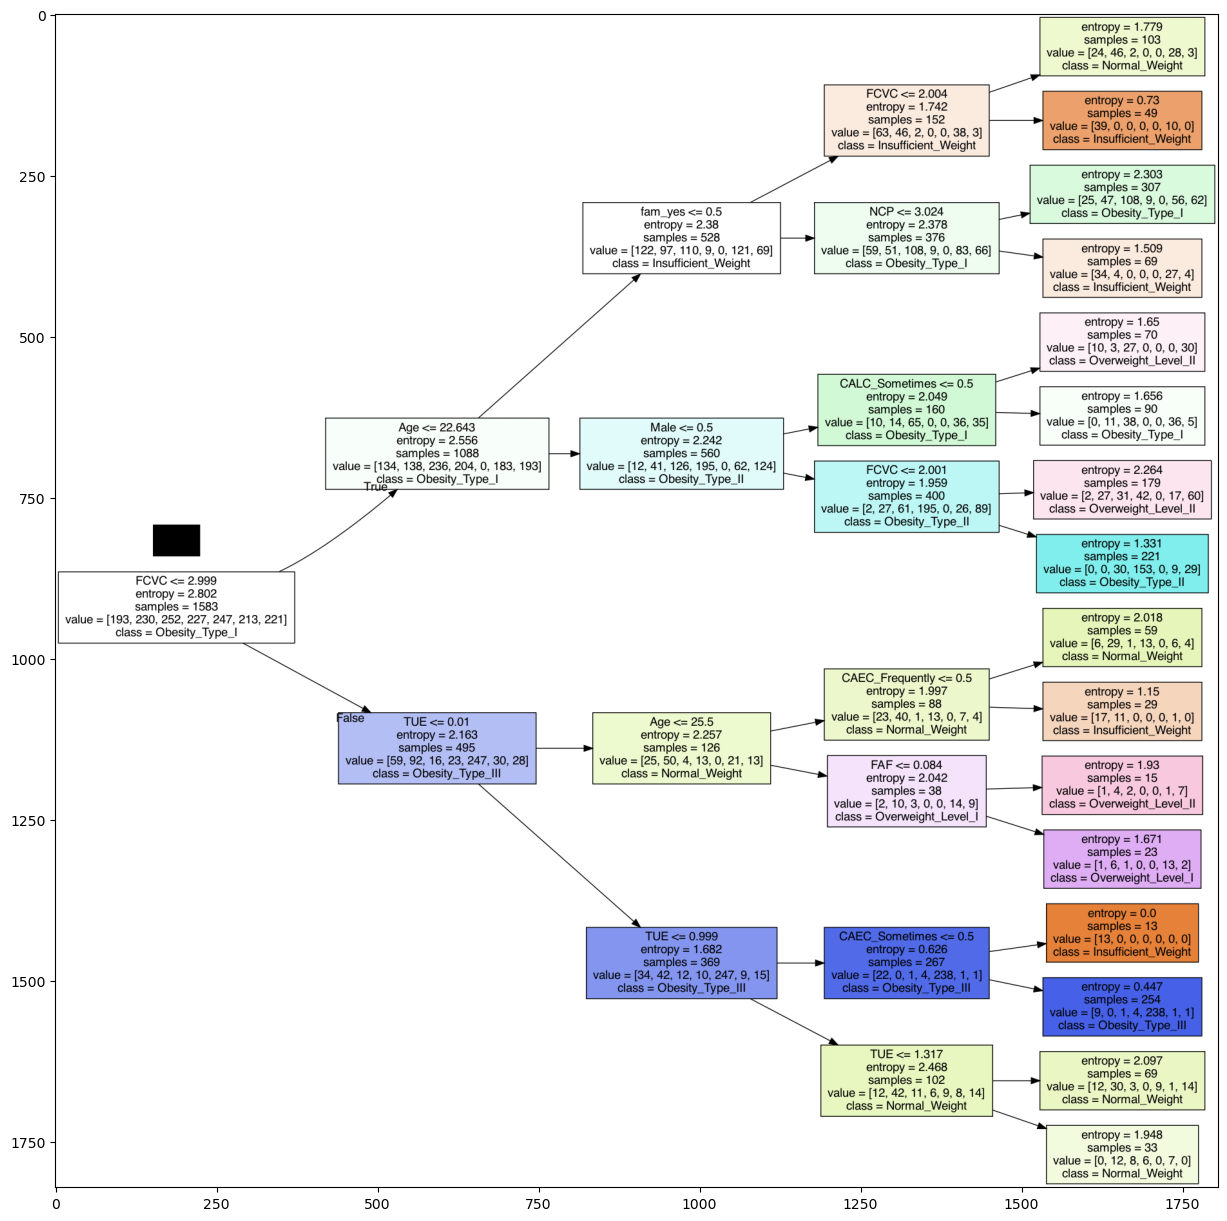

In [ ]:
plt.figure(figsize=(15, 25))
plt.imshow(img)

In [ ]:
pred = m.predict(xtest)
m.score(xtest, ytest)  # accuracy
print('Accuracy', metrics.accuracy_score(ytest, pred))
print('Precision', metrics.precision_score(ytest, pred, average='macro'))
print('Recall', metrics.recall_score(ytest, pred, average='macro'))
print('F1 Score', metrics.f1_score(ytest, pred, average='macro'))

Accuracy 0.5397727272727273
Precision 0.5439429090744881
Recall 0.5460711379092914
F1 Score 0.5177013389535717


In [ ]:
print(classification_report(ytest, pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.75      0.54      0.63        79
      Normal_Weight       0.40      0.63      0.49        57
     Obesity_Type_I       0.39      0.49      0.44        99
    Obesity_Type_II       0.70      0.74      0.72        70
   Obesity_Type_III       0.91      0.95      0.93        77
 Overweight_Level_I       0.33      0.03      0.05        77
Overweight_Level_II       0.32      0.43      0.37        69

           accuracy                           0.54       528
          macro avg       0.54      0.55      0.52       528
       weighted avg       0.55      0.54      0.52       528



In [ ]:
metrics.confusion_matrix(ytest, pred)

array([[43, 21,  6,  0,  2,  0,  7],
       [ 3, 36, 14,  0,  0,  1,  3],
       [ 1,  7, 49,  7,  0,  3, 32],
       [ 0,  2,  2, 52,  0,  0, 14],
       [ 0,  3,  0,  0, 73,  0,  1],
       [10, 14, 36,  5,  2,  2,  8],
       [ 0,  7, 19, 10,  3,  0, 30]])